In [1]:
import os
import time
import uuid 
import cv2

Kumpulin Gambar Pake OpenCv

In [2]:
IMAGES_PATH = os.path.join('data', 'images')

number_images = 30

In [8]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Mengambil Gambar {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Mengambil Gambar 0
Mengambil Gambar 1
Mengambil Gambar 2
Mengambil Gambar 3
Mengambil Gambar 4
Mengambil Gambar 5
Mengambil Gambar 6
Mengambil Gambar 7
Mengambil Gambar 8
Mengambil Gambar 9
Mengambil Gambar 10
Mengambil Gambar 11
Mengambil Gambar 12
Mengambil Gambar 13
Mengambil Gambar 14
Mengambil Gambar 15
Mengambil Gambar 16
Mengambil Gambar 17
Mengambil Gambar 18
Mengambil Gambar 19
Mengambil Gambar 20
Mengambil Gambar 21
Mengambil Gambar 22
Mengambil Gambar 23
Mengambil Gambar 24
Mengambil Gambar 25
Mengambil Gambar 26
Mengambil Gambar 27
Mengambil Gambar 28
Mengambil Gambar 29


annotate gambar pake labelme

In [10]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\ellbendl\.labelmerc


data preprocessing #2

Import tflow

In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

limit gpu

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Load Gambar

In [6]:
images = tf.data.Dataset.list_files('data\\train\\images\\*.jpg')

In [7]:
images.as_numpy_iterator().next()

b'data\\train\\images\\830ef3e5-1acd-11ed-a11b-dc1ba1f0854c.jpg'

In [8]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [9]:
images = images.map(load_image)

In [10]:
images.as_numpy_iterator().next()

array([[[122, 116, 102],
        [121, 115, 101],
        [118, 114, 102],
        ...,
        [220, 219, 217],
        [220, 219, 217],
        [219, 218, 216]],

       [[121, 115, 101],
        [117, 114,  99],
        [116, 112, 100],
        ...,
        [220, 219, 217],
        [219, 218, 216],
        [220, 219, 217]],

       [[119, 116, 101],
        [117, 114,  99],
        [116, 113,  98],
        ...,
        [218, 218, 216],
        [219, 218, 216],
        [219, 218, 216]],

       ...,

       [[244, 235, 240],
        [243, 234, 239],
        [240, 234, 238],
        ...,
        [ 11,  10,   8],
        [ 11,  11,   9],
        [ 14,  14,  12]],

       [[241, 236, 240],
        [240, 235, 239],
        [237, 235, 240],
        ...,
        [ 13,  11,  12],
        [ 14,  14,  14],
        [ 16,  18,  17]],

       [[237, 235, 238],
        [237, 235, 238],
        [236, 235, 240],
        ...,
        [ 17,  17,  17],
        [ 20,  20,  22],
        [ 22,  23,  25]]

Liat Gambar

In [11]:
image_generator = images.batch(4).as_numpy_iterator()

In [12]:
plot_images = image_generator.next()

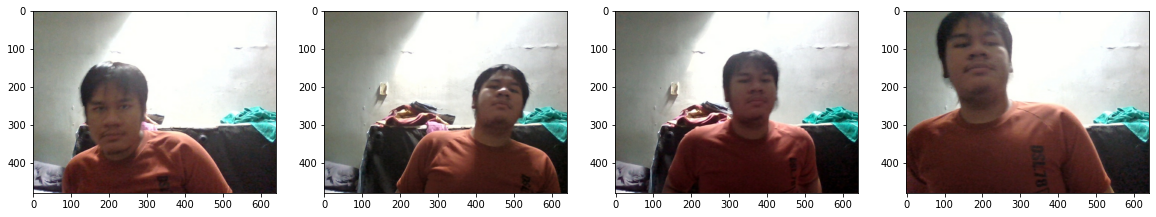

In [13]:
from email.mime import image


fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)

plt.show()


#3 Plit train test
train 63
test 14
val 13

In [64]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

setup library albumentations

In [17]:
!pip install albumentations

In [14]:
import albumentations as alb

In [15]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [18]:
img = cv2.imread(os.path.join('data', 'train', 'images', '7a47cc4d-1acd-11ed-9960-dc1ba1f0854c.jpg'))

In [19]:
img

array([[[ 85,  89,  78],
        [ 84,  88,  76],
        [ 81,  88,  75],
        ...,
        [184, 186, 180],
        [182, 186, 181],
        [179, 185, 180]],

       [[ 84,  88,  76],
        [ 82,  89,  76],
        [ 81,  88,  73],
        ...,
        [184, 186, 180],
        [182, 186, 180],
        [180, 187, 180]],

       [[ 81,  89,  72],
        [ 82,  90,  73],
        [ 82,  90,  73],
        ...,
        [183, 186, 177],
        [182, 187, 178],
        [183, 188, 179]],

       ...,

       [[215, 204, 200],
        [214, 205, 201],
        [211, 207, 202],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[218, 210, 203],
        [216, 210, 203],
        [213, 210, 202],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[216, 210, 203],
        [212, 209, 201],
        [211, 208, 200],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]]

In [21]:
with open(os.path.join('data', 'train', 'labels', '7a47cc4d-1acd-11ed-9960-dc1ba1f0854c.json'), 'r') as f:
    label = json.load(f)

In [25]:
label['shapes'][0]['points']

[[229.65989847715736, 98.4771573604061],
 [415.4467005076142, 307.61421319796955]]

In [26]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [27]:
coords

[229.65989847715736, 98.4771573604061, 415.4467005076142, 307.61421319796955]

In [28]:
coords = list(np.divide(coords, [640,480,640,480]))

In [29]:
coords

[0.3588435913705584,
 0.20516074450084604,
 0.6491354695431472,
 0.6408629441624366]

In [30]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [31]:
augmented['bboxes'][0][2:]

(0.7074224478285391, 0.8456063169768754)

In [32]:
augmented['bboxes']

[(0.2945628877608574,
  0.3808573040045121,
  0.7074224478285391,
  0.8456063169768754)]

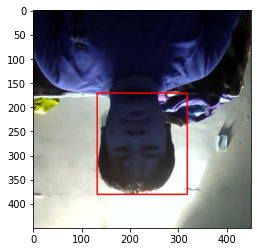

In [33]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

#5

In [34]:
 for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

y_max is less than or equal to y_min for bbox [0.3842243020304569, 0.2686125211505922, 0.6523080583756345, 0.0010575296108291032, 'face'].
y_max is less than or equal to y_min for bbox [0.38105171319796954, 0.6503807106598986, 0.5928220177664975, 0.33100676818950936, 'face'].


In [35]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [36]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [37]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [38]:
train_images.as_numpy_iterator().next()

array([[[2.8872550e-01, 3.2493871e-01, 3.0257353e-01],
        [2.8137255e-01, 3.1764707e-01, 3.0281863e-01],
        [2.9166666e-01, 3.2696077e-01, 3.2009804e-01],
        ...,
        [6.4675248e-01, 7.0557600e-01, 7.3008579e-01],
        [6.4313728e-01, 7.0196080e-01, 7.2218138e-01],
        [6.2647057e-01, 6.8805146e-01, 7.0674020e-01]],

       [[3.0539215e-01, 3.3578432e-01, 3.1127450e-01],
        [2.8143382e-01, 3.1672794e-01, 2.9810050e-01],
        [2.9748774e-01, 3.3278185e-01, 3.2101715e-01],
        ...,
        [6.5049022e-01, 7.0931375e-01, 7.2892159e-01],
        [6.5398282e-01, 7.0582110e-01, 7.2892159e-01],
        [6.3743871e-01, 6.8805146e-01, 7.1158087e-01]],

       [[3.2303920e-01, 3.4656861e-01, 3.3088234e-01],
        [2.9405639e-01, 3.2935050e-01, 3.1072304e-01],
        [2.9705882e-01, 3.3235294e-01, 3.2058823e-01],
        ...,
        [6.4307600e-01, 7.0189953e-01, 7.2150737e-01],
        [6.4356619e-01, 6.9454658e-01, 7.1807599e-01],
        [6.3768381e-01

prepare label


In [39]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [41]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [43]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [44]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.188 , 0.2003, 0.5728, 0.6436], dtype=float16))

#7

In [45]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)


(3720, 3720, 840, 840, 720, 720)

In [46]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [47]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [48]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [49]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.6646, 0.2937, 0.9883, 0.658 ],
        [0.5615, 0.309 , 0.899 , 0.697 ],
        [0.4297, 0.6157, 0.873 , 1.    ],
        [0.54  , 0.2114, 0.961 , 0.567 ],
        [0.    , 0.2925, 0.3364, 0.659 ],
        [0.5356, 0.2888, 0.9204, 0.743 ],
        [0.    , 0.4546, 0.0524, 0.843 ],
        [0.2356, 0.2615, 0.671 , 0.744 ]], dtype=float16))

In [50]:
data_samples = train.as_numpy_iterator()

In [51]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


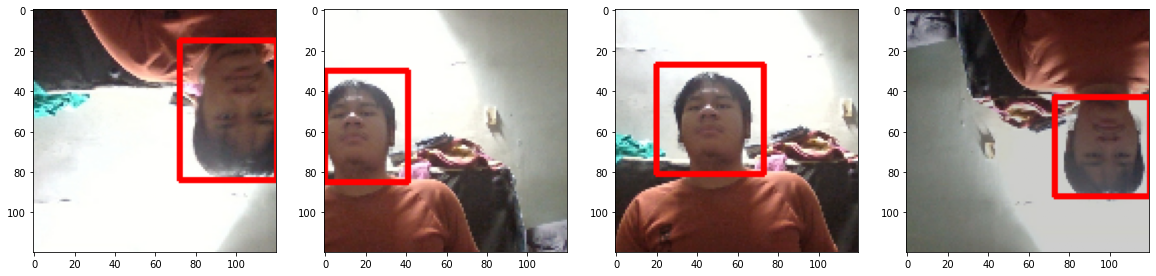

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

#8

In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

import os
import time
import uuid 
import cv2


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [54]:
vgg = VGG16(include_top=False)

58900480/58889256 [==============================] - 15s 0us/step


In [55]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [56]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [57]:
facetracker = build_model()

In [58]:
facetracker.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [59]:
X, y = train.as_numpy_iterator().next()

In [60]:
X.shape

(8, 120, 120, 3)

In [61]:
classes, coords = facetracker.predict(X)

In [62]:
classes, coords


(array([[0.5636861 ],
        [0.5486252 ],
        [0.71624726],
        [0.5759492 ],
        [0.56486917],
        [0.53319734],
        [0.6306353 ],
        [0.5634656 ]], dtype=float32),
 array([[0.6916281 , 0.5723083 , 0.54119664, 0.50131655],
        [0.62998724, 0.6208037 , 0.5620167 , 0.5254416 ],
        [0.7092669 , 0.6364648 , 0.51230836, 0.44721496],
        [0.6955029 , 0.57668346, 0.6171957 , 0.56983095],
        [0.5692964 , 0.58435553, 0.43180642, 0.5428735 ],
        [0.6676982 , 0.6059588 , 0.5075822 , 0.5306996 ],
        [0.73751146, 0.57388043, 0.6024382 , 0.58314717],
        [0.6711773 , 0.70197755, 0.46908125, 0.47034553]], dtype=float32))

#9

In [63]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [64]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [65]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [66]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [67]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.8288245>

In [68]:
classloss(y[0], classes)


<tf.Tensor: shape=(), dtype=float32, numpy=0.6524606>

In [69]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.8288245>

#10

In [70]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [71]:
model = FaceTracker(facetracker)

In [72]:
model.compile(opt, classloss, regressloss)

In [73]:
logdir='logs'

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
465/465 [==============================] - 39s 67ms/step - total_loss: 0.2855 - class_loss: 0.0565 - regress_loss: 0.2572 - val_total_loss: 0.4190 - val_class_loss: 0.0680 - val_regress_loss: 0.3850
Epoch 2/10
465/465 [==============================] - 31s 59ms/step - total_loss: 0.0758 - class_loss: 0.0165 - regress_loss: 0.0675 - val_total_loss: 0.0545 - val_class_loss: 8.9445e-04 - val_regress_loss: 0.0540
Epoch 3/10
465/465 [==============================] - 30s 58ms/step - total_loss: 0.0520 - class_loss: 0.0135 - regress_loss: 0.0452 - val_total_loss: 0.0514 - val_class_loss: 1.2083e-04 - val_regress_loss: 0.0513
Epoch 4/10
465/465 [==============================] - 30s 58ms/step - total_loss: 0.0360 - class_loss: 0.0066 - regress_loss: 0.0327 - val_total_loss: 0.0257 - val_class_loss: 7.3613e-06 - val_regress_loss: 0.0257
Epoch 5/10
465/465 [==============================] - 30s 58ms/step - total_loss: 0.0181 - class_loss: 0.0045 - regress_loss: 0.0159 - val_total_los

In [76]:
hist.history


{'total_loss': [0.0905439704656601,
  0.025035984814167023,
  0.018315544351935387,
  0.025205576792359352,
  0.010303966701030731,
  0.006324551068246365,
  0.0065592690370976925,
  0.00901694968342781,
  0.03594403713941574,
  0.009928364306688309],
 'class_loss': [0.007470195181667805,
  0.0010822705226019025,
  6.259846850298345e-05,
  8.389341383008286e-05,
  9.661947115091607e-05,
  0.00016478162433486432,
  0.00019726992468349636,
  0.00038300949381664395,
  1.8194645235780627e-05,
  0.00021697879128623754],
 'regress_loss': [0.08680887520313263,
  0.024494849145412445,
  0.01828424446284771,
  0.02516363002359867,
  0.010255657136440277,
  0.006242160219699144,
  0.006460634060204029,
  0.008825444616377354,
  0.0359349399805069,
  0.009819874539971352],
 'val_total_loss': [0.41897329688072205,
  0.054488953202962875,
  0.05138938128948212,
  0.02571319043636322,
  0.057712092995643616,
  0.02759270928800106,
  0.039465539157390594,
  0.045243825763463974,
  0.03288238123059273

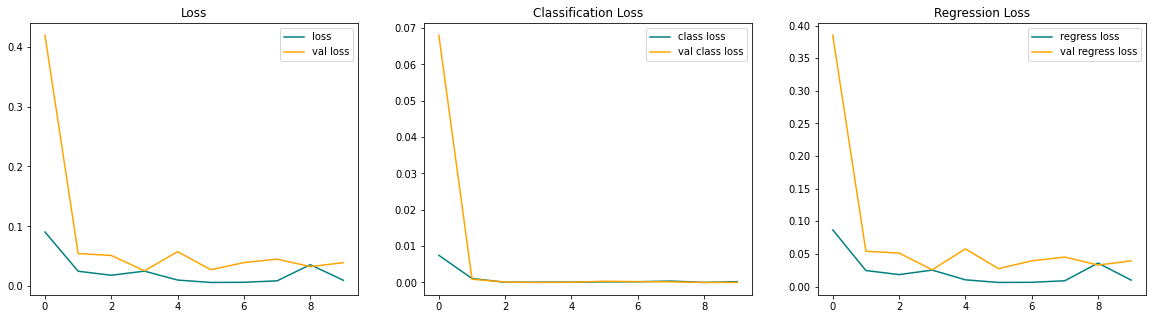

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

#11

In [78]:
test_data = test.as_numpy_iterator()

In [79]:
test_sample = test_data.next()


In [80]:
yhat = facetracker.predict(test_sample[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


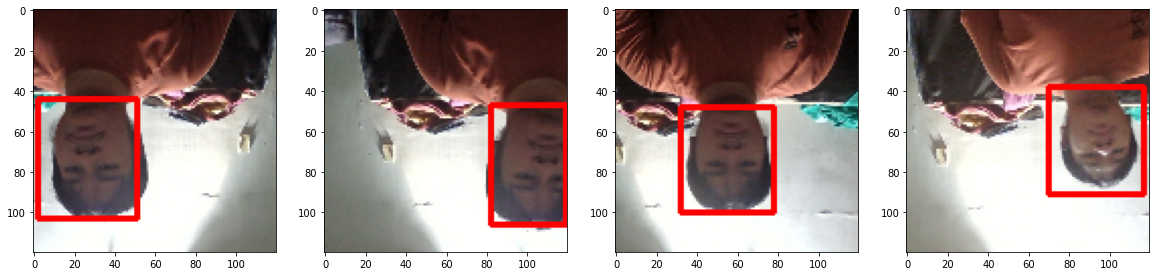

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [1]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:

from tensorflow.keras.models import load_model

import cv2

In [4]:
facetracker.save('facetracker.h5')

NameError: name 'facetracker' is not defined

In [ ]:
%pip uninstall opencv-python-headless -y 

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Successfully uninstalled opencv-python-headless-4.6.0.66
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\commands\uninstall.py", line 102, in run
    uninstall_pathset.commit()
  File "c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\req\req_uninstall.py", line 420, in commit
    self._moved_paths.commit()
  File "c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\req\req_uninstall.py", line 273, in commit
    save_dir.cleanup()
  File "c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\t

In [6]:
%pip install opencv-python --upgrade


  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.64
    Uninstalling opencv-python-4.5.5.64:
      Successfully uninstalled opencv-python-4.5.5.64
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ellbendl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
facetracker = load_model('facetracker.h5')

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('Face Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
